<a href="https://colab.research.google.com/github/Kristianerik/TensorFlow-Car-Price-Prediction-Project/blob/main/TensorFlow_Car_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Project Price prediction

In [136]:
import tensorflow as tf ###models
import pandas as pd ### reading and processing data
import seaborn as sns ### Graphing and Plotting
import numpy as np
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



Data Prep

In [50]:
data = pd.read_csv("train.csv",",")

<ipython-input-50-f337a82a2e29>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("train.csv",",")


In [ ]:
data.head()
data.shape

(1000, 12)

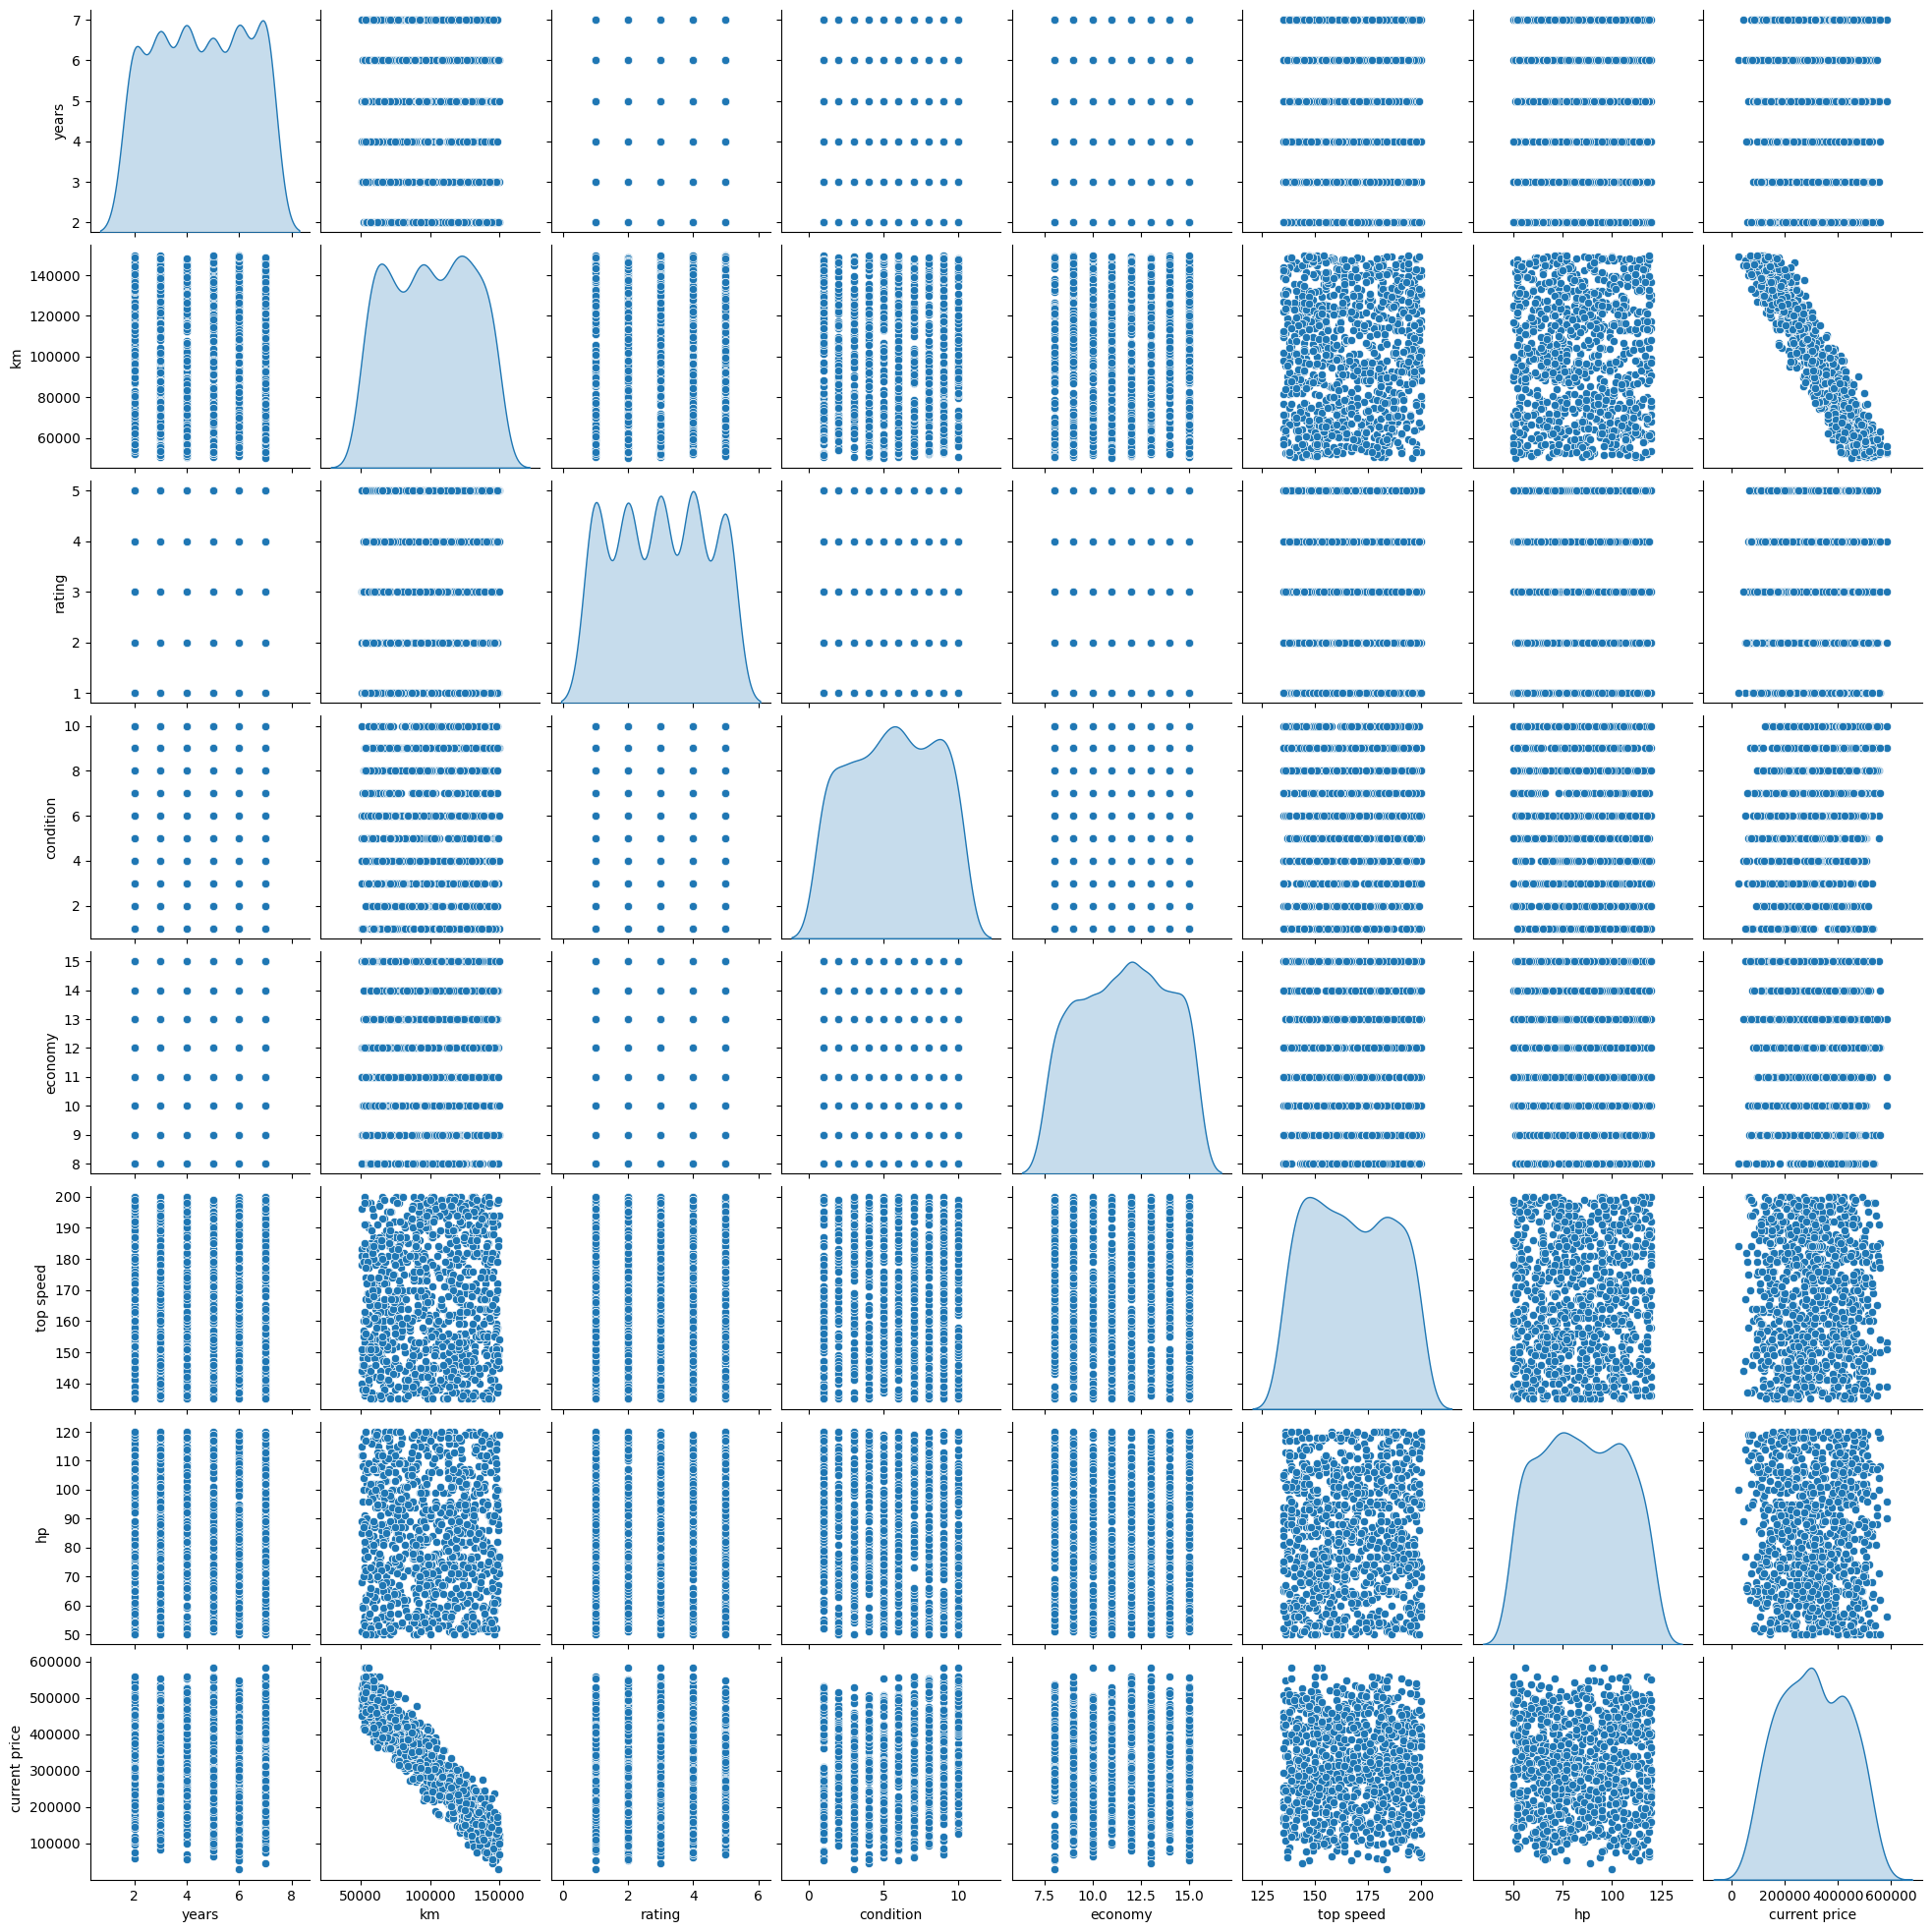

In [ ]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'current price']], diag_kind='kde')

In [ ]:
tensor_data = tf.constant(data)
tensore_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[8.960000e+02 5.226900e+05 7.007330e+05 3.000000e+00 6.216100e+04
  1.000000e+00 2.000000e+00 8.000000e+00 1.700000e+02 1.200000e+02
  9.400000e+01 3.631865e+05]
 [1.130000e+02 5.386230e+05 7.219970e+05 7.000000e+00 1.194120e+05
  3.000000e+00 6.000000e+00 8.000000e+00 1.840000e+02 8.000000e+01
  1.180000e+02 1.484910e+05]
 [7.020000e+02 6.484560e+05 7.671220e+05 7.000000e+00 7.867700e+04
  1.000000e+00 3.000000e+00 1.200000e+01 1.640000e+02 8.700000e+01
  6.800000e+01 3.850310e+05]
 [3.980000e+02 5.059000e+05 8.094050e+05 7.000000e+00 9.259800e+04
  5.000000e+00 7.000000e+00 1.400000e+01 1.860000e+02 8.600000e+01
  1.200000e+02 2.891170e+05]
 [1.430000e+02 5.655760e+05 8.947460e+05 7.000000e+00 1.129100e+05
  4.000000e+00 5.000000e+00 1.000000e+01 1.710000e+02 1.070000e+02
  1.130000e+02 2.724375e+05]], shape=(5, 12), dtype=float64)


In [ ]:
X = tensor_data[:,3:-1]

print(X[:5])

tf.Tensor(
[[3.00000e+00 6.21610e+04 1.00000e+00 2.00000e+00 8.00000e+00 1.70000e+02
  1.20000e+02 9.40000e+01]
 [7.00000e+00 1.19412e+05 3.00000e+00 6.00000e+00 8.00000e+00 1.84000e+02
  8.00000e+01 1.18000e+02]
 [7.00000e+00 7.86770e+04 1.00000e+00 3.00000e+00 1.20000e+01 1.64000e+02
  8.70000e+01 6.80000e+01]
 [7.00000e+00 9.25980e+04 5.00000e+00 7.00000e+00 1.40000e+01 1.86000e+02
  8.60000e+01 1.20000e+02]
 [7.00000e+00 1.12910e+05 4.00000e+00 5.00000e+00 1.00000e+01 1.71000e+02
  1.07000e+02 1.13000e+02]], shape=(5, 8), dtype=float64)


In [ ]:
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis = -1)
print(y[:5].shape)

(5, 1)


In [ ]:
normalizer = Normalization(axis = -1, mean = 5, variance = 4)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [ ]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8],
                             [32,1,56,3,5]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 ,  0.39223233, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  0.98058075, -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.3728129 ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [ ]:
print(X.shape)

(1000, 8)


In [100]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [109]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [171]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [162]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[7.00000e+00 1.12910e+05 4.00000e+00 5.00000e+00 1.00000e+01 1.71000e+02
  1.07000e+02 1.13000e+02]
 [6.00000e+00 1.25022e+05 3.00000e+00 1.00000e+01 1.40000e+01 1.88000e+02
  8.50000e+01 1.37000e+02]
 [2.00000e+00 1.38955e+05 2.00000e+00 2.00000e+00 1.40000e+01 1.81000e+02
  1.06000e+02 1.18000e+02]
 [7.00000e+00 1.19412e+05 3.00000e+00 6.00000e+00 8.00000e+00 1.84000e+02
  8.00000e+01 1.18000e+02]
 [3.00000e+00 6.21610e+04 1.00000e+00 2.00000e+00 8.00000e+00 1.70000e+02
  1.20000e+02 9.40000e+01]
 [7.00000e+00 9.25980e+04 5.00000e+00 7.00000e+00 1.40000e+01 1.86000e+02
  8.60000e+01 1.20000e+02]
 [7.00000e+00 8.94570e+04 1.00000e+00 8.00000e+00 1.00000e+01 1.84000e+02
  1.08000e+02 1.05000e+02]
 [3.00000e+00 9.72230e+04 1.00000e+00 3.00000e+00 1.20000e+01 1.73000e+02
  9.90000e+01 1.35000e+02]
 [2.00000e+00 7.41610e+04 4.00000e+00 9.00000e+00 1.10000e+01 1.79000e+02
  1.00000e+02 1.07000e+02]
 [6.00000e+00 8.92790e+04 2.00000e+00 7.00000e+00 8.00000e+00 1.53000e+02
  7.80

In [110]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [169]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [113]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [168]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
normalizer = Normalization()
x_normalized = tf.constant(X)
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[-0.90849847, -1.3081267 , -1.4178835 , ...,  0.16116175,
         1.7289006 , -0.4476862 ],
       [ 1.4194926 ,  0.65683883,  0.00855888, ...,  0.8873505 ,
        -0.22168338,  0.6925547 ],
       [ 1.4194926 , -0.7412655 , -1.4178835 , ..., -0.150062  ,
         0.11966881, -1.6829472 ],
       ...,
       [ 0.2554971 , -0.19739996,  1.4350013 , ...,  0.0574205 ,
         0.6073148 , -0.78025645],
       [ 1.4194926 ,  1.4117156 ,  0.00855888, ..., -0.565027  ,
         1.2900192 , -1.2078468 ],
       [ 0.83749485, -1.4302098 ,  0.00855888, ..., -0.7206389 ,
         1.5826068 ,  0.07492422]], dtype=float32)>

In [144]:
model = tf.keras.Sequential([
                              InputLayer(input_shape = (8,)),
                              normalizer,
                              Dense(128, activation = "relu"),
                              Dense(128, activation = "relu"),
                              Dense(128, activation = "relu"),
                              Dense(1),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
_________________________________________________

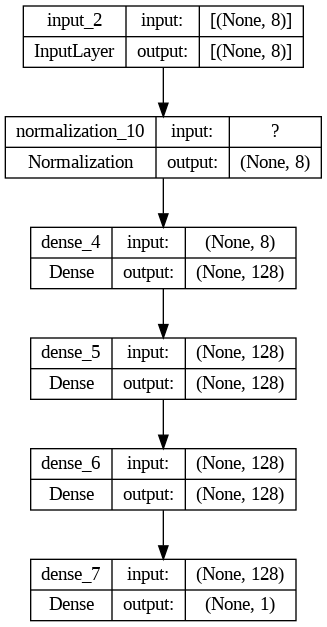

In [145]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [172]:
model.compile(optimizer= Adam(learning_rate=0.1),
              loss= MeanAbsoluteError(),
              metrics = RootMeanSquaredError(),
              )

In [190]:
history = model.fit(train_dataset, validation_data= val_dataset,epochs = 100, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 36371.7773 - root_mean_squared_error: 45543.5625 - val_loss: 36543.9766 - val_root_mean_squared_error: 45794.4258
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 38513.1836 - root_mean_squared_error: 47815.4531 - val_loss: 25077.8750 - val_root_mean_squared_error: 31975.7246
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 35561.1992 - root_mean_squared_error: 44629.3750 - val_loss: 21051.6348 - val_root_mean_squared_error: 26785.5742
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 30882.9102 - root_mean_squared_error: 40113.7578 - val_loss: 20393.8203 - val_root_mean_squared_error: 26146.5098
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 25224.5352 - root_mean_squared_error: 34132.2344 - val_loss: 17822.3184 - val_root_mean_squared_error: 23201.7383
Epoch 6/100
25/25 [==============================] - 0s 4ms/step 

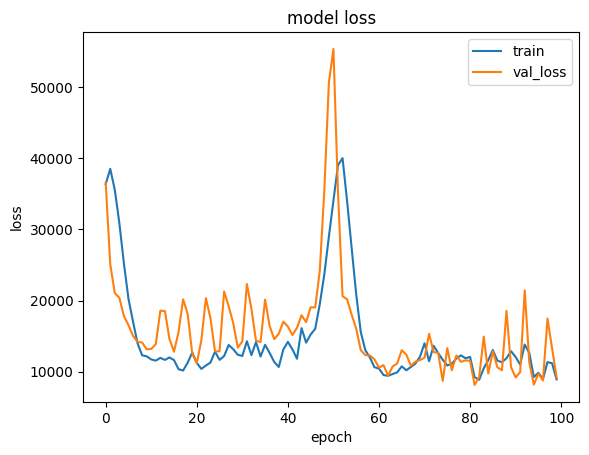

In [191]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

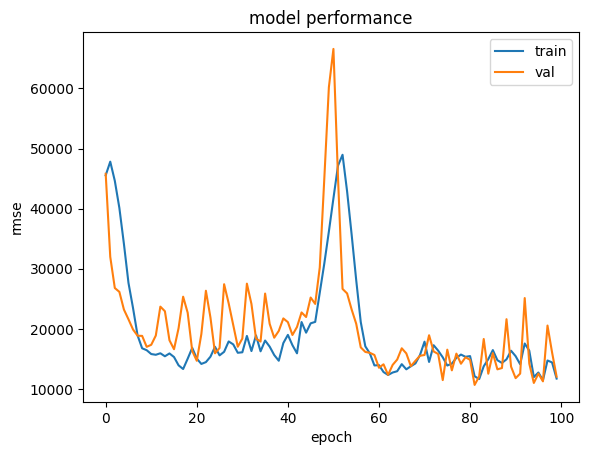

In [192]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [150]:
history.history

{'loss': [153214.703125,
  56932.61328125,
  48476.08984375,
  54559.0546875,
  46560.484375,
  39156.890625,
  41479.9765625,
  41318.80078125,
  41077.48828125,
  41901.9140625,
  37341.3515625,
  41720.51171875,
  38053.62890625,
  44234.9140625,
  38794.10546875,
  41222.05859375,
  39059.99609375,
  40806.4921875,
  38482.92578125,
  39902.59765625,
  37302.1796875,
  48105.203125,
  46843.60546875,
  38710.3359375,
  37953.60546875,
  35084.046875,
  35253.1640625,
  35840.921875,
  48636.6953125,
  42346.76953125,
  37831.0078125,
  37506.31640625,
  36933.5234375,
  38391.07421875,
  39254.24609375,
  35683.94140625,
  35190.109375,
  36193.2265625,
  37743.73828125,
  35018.74609375,
  36220.0390625,
  34107.81640625,
  36480.890625,
  39890.01953125,
  36027.06640625,
  36805.16015625,
  35570.87109375,
  41282.8203125,
  39956.3984375,
  38823.09375,
  34879.12109375,
  36677.84765625,
  38568.7109375,
  39353.0234375,
  35234.25390625,
  39383.14453125,
  37479.96484375,
  

In [195]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 41504.4141 - root_mean_squared_error: 52940.2852


[41504.4140625, 52940.28515625]

In [127]:
X_test.shape

TensorShape([100, 8])

In [155]:
model.predict(tf.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 122ms/step


array([[412875.78]], dtype=float32)

In [154]:
y_true = list(y_test[:,0].numpy())

In [156]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 5ms/step
[412875.75, 253174.31, 172084.78, 183964.98, 195242.7, 234409.5, 420539.28, 504756.44, 309218.5, 246586.06, 395339.6, 120704.47, 320622.12, 223364.12, 297368.56, 154214.25, 364352.5, 439449.62, 216767.9, 358091.84, 240570.58, 305883.4, 111150.695, 254833.92, 384307.03, 528280.3, 345809.47, 249095.8, 402984.25, 432116.8, 121295.12, 263182.0, 477869.25, 236795.75, 339121.1, 406338.72, 368158.5, 343516.2, 328236.03, 163753.77, 217773.22, 435129.06, 344798.44, 120781.164, 164708.34, 228107.62, 396287.72, 279335.12, 517353.56, 377827.53, 443873.1, 438237.9, 276241.84, 202766.95, 119342.33, 350647.28, 493709.62, 358257.25, 385859.78, 393680.7, 432291.72, 380118.4, 303480.03, 227266.98, 358495.2, 468721.25, 356607.0, 215264.52, 449912.25, 221143.31, 201932.38, 272239.25, 279368.72, 202803.9, 390837.97, 397732.38, 427882.44, 461503.72, 169838.61, 365462.9, 444492.94, 451426.16, 153959.86, 170365.42, 385524.44, 418662.56, 151421.25, 127175.48, 

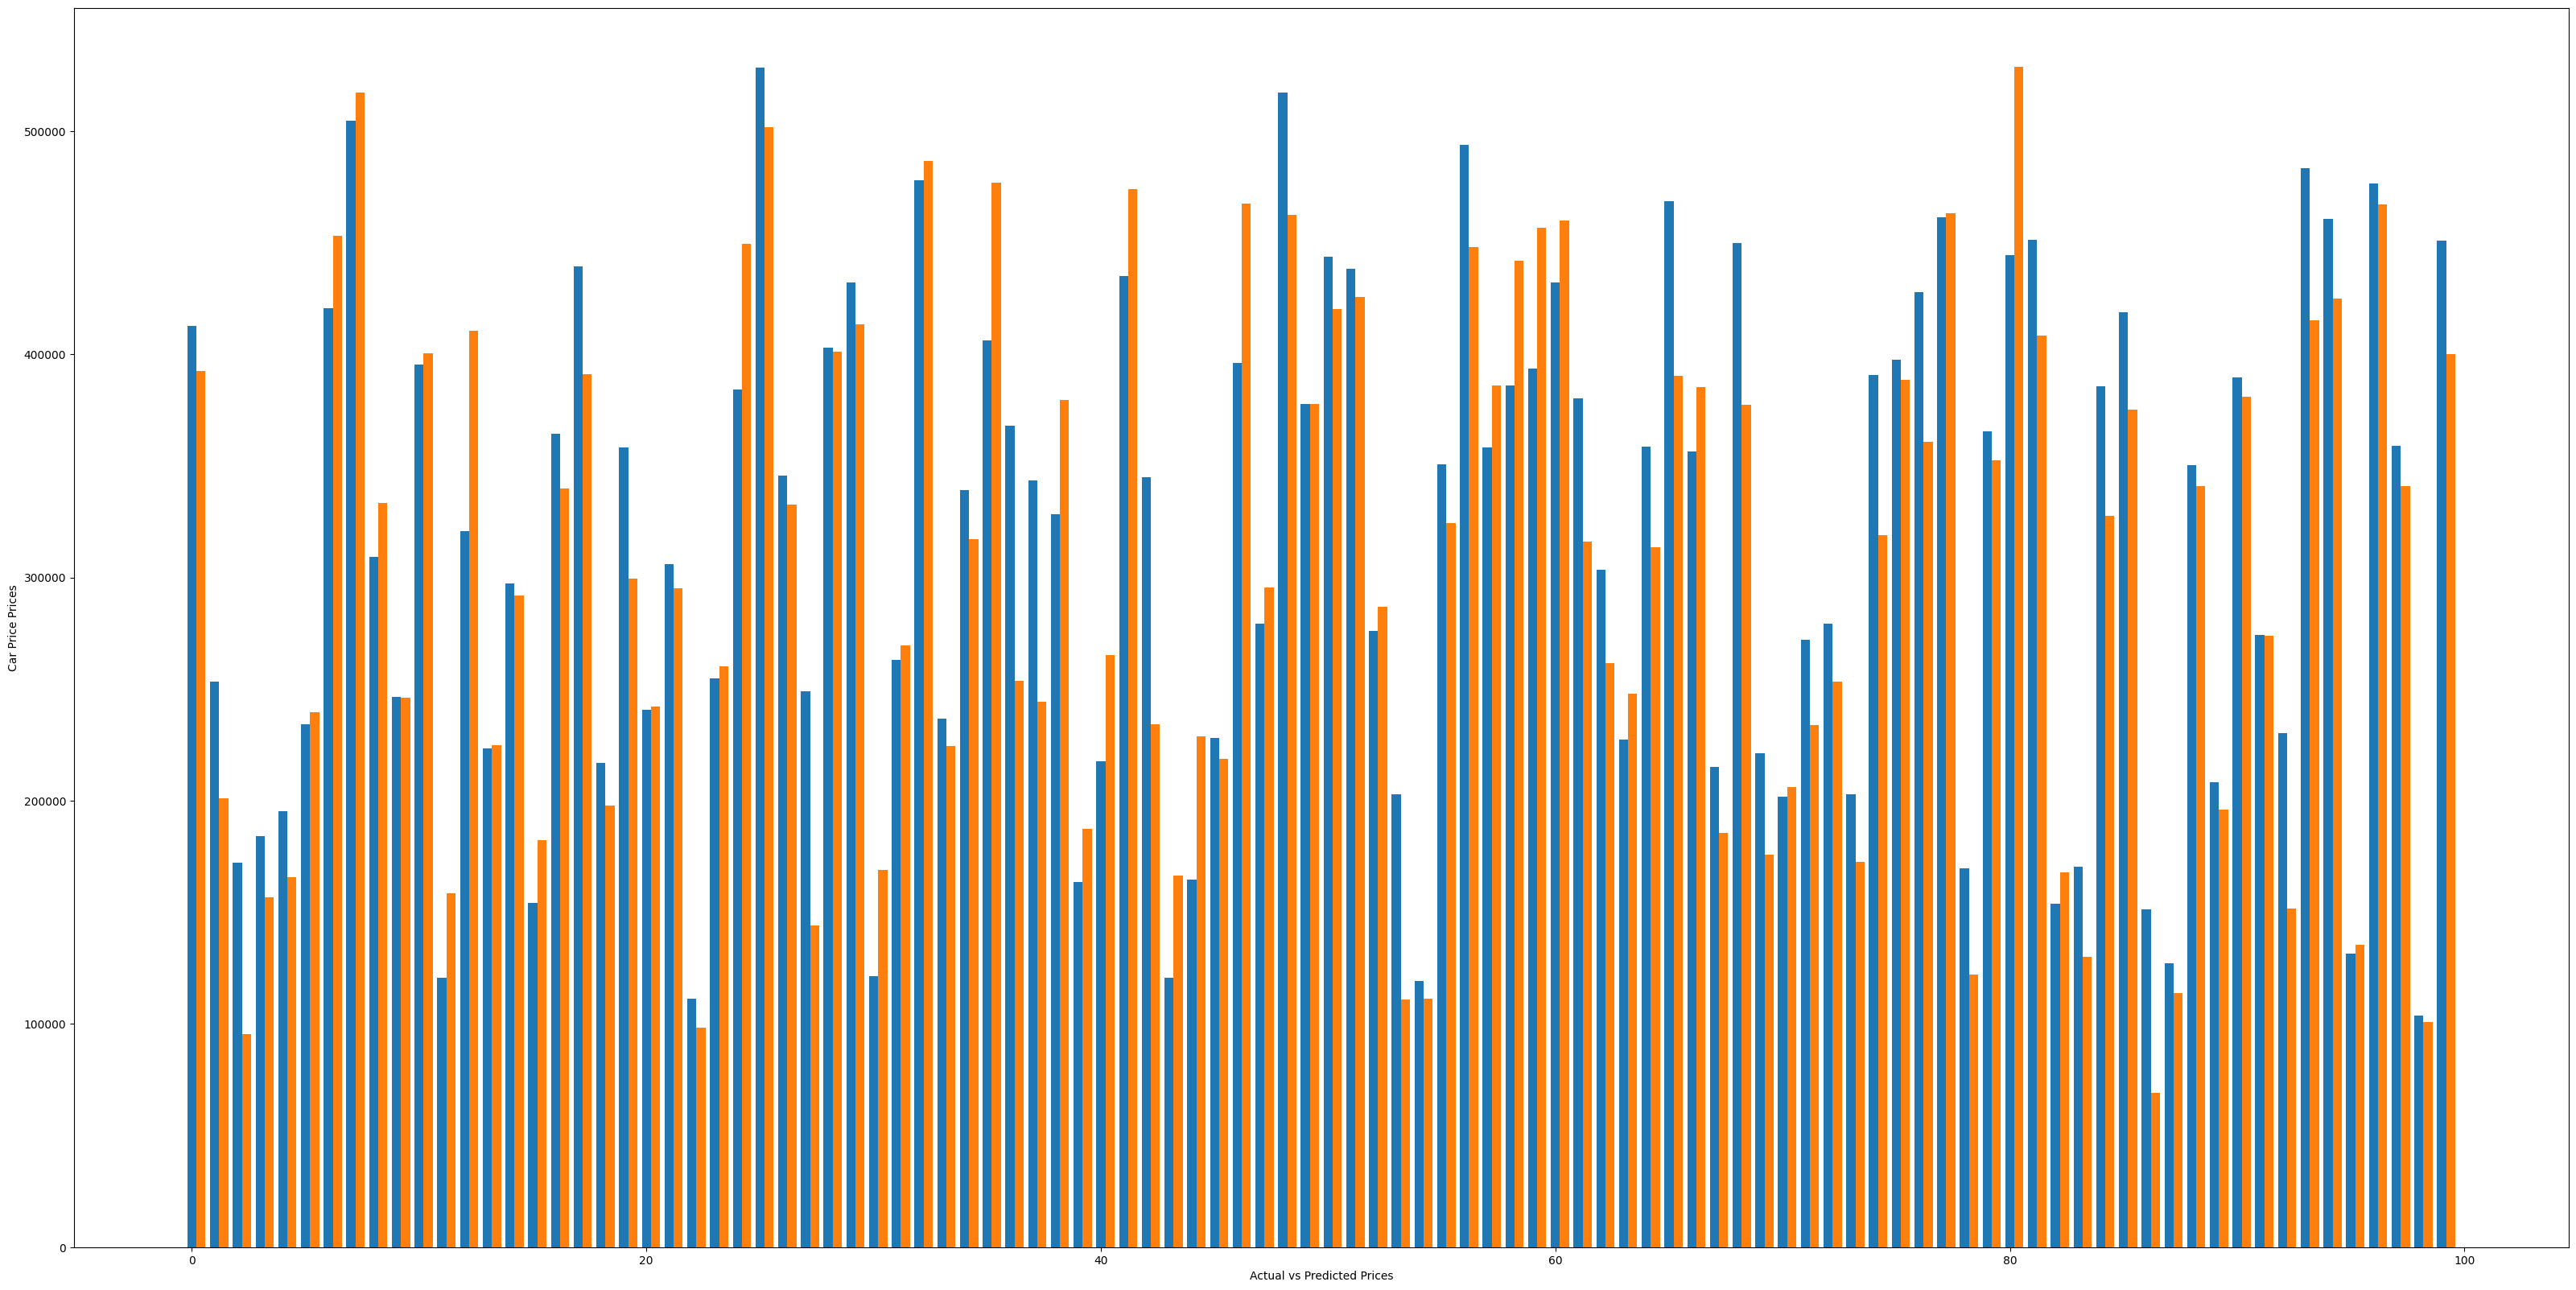

In [194]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.4

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()